## Day 27 Lecture 1 Assignment

In this assignment, we will learn statistical significance in linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import bartlett
from scipy.stats import levene
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pylab
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [11]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [13]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will predict app ratings using other features describing the app. To use these features, we must clean the data.

To simplify, we will remove the app, category, size, installs, genres, last updated, current ver, and android ver columns. 

In [14]:
# answer below:
rev = reviews.drop(columns=['App', 'Category', 'Size', 'Installs', 'Last Updated', 'Current Ver', 'Genres', 'Android Ver'], axis=1)

Check for missing values and remove all rows containing missing values

In [15]:
# answer below:
rev = rev.dropna()

Remove outliers from the Type and Content Rating columns (very rare values that won't train well).

In [16]:
# answer below:
print(rev['Type'].value_counts(), '\n')
print(rev['Content Rating'].value_counts())
rev = rev[rev['Content Rating'] != 'Unrated']
rev = rev[rev['Content Rating'] != 'Adults only 18+']
print('\n')
print(rev['Content Rating'].value_counts())
print('\n')
print(rev['Type'].value_counts())

Free    8719
Paid     647
Name: Type, dtype: int64 

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64


Everyone        7420
Teen            1084
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64


Free    8715
Paid     647
Name: Type, dtype: int64


Convert the Type and Content Rating columns to a numeric format, whether by one-hot encoding, ordinal encoding, or similar.

In [17]:
# answer below:
type_dummies = pd.get_dummies(rev['Type'], drop_first=True)
content_dummies = pd.get_dummies(rev['Content Rating'], drop_first=True)
data = rev.drop(columns=['Type', 'Content Rating'], axis=1)
clean_data = pd.concat([data, type_dummies, content_dummies], axis=1)

Finally, check that all the columns are of numeric type and change the type of columns that are not numeric. If coercing to numeric causes missing values, remove those rows containing missing values from our dataset.

In [18]:
# answer below:

print(clean_data.dtypes)
clean_data['Reviews'] = clean_data['Reviews'].apply(lambda x: float(x))


def money_to_float(money):
  if money[0] == '$':
    money = money[1::]
  return float(money)


clean_data['Price'] = clean_data['Price'].apply(lambda x: money_to_float(x))
clean_data.dtypes

Rating          float64
Reviews          object
Price            object
Paid              uint8
Everyone 10+      uint8
Mature 17+        uint8
Teen              uint8
dtype: object


Rating          float64
Reviews         float64
Price           float64
Paid              uint8
Everyone 10+      uint8
Mature 17+        uint8
Teen              uint8
dtype: object

Perform a train test split with 20% of the data in the test sample.

In [19]:
# answer below:
y = clean_data['Rating']
X = clean_data.iloc[:, 1::]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Now generate a linear model using statsmodels and produce a p value for each coefficient in the model. Analyze the results. (Look at the results table and at a homoscedasticity plot.)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.53
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           7.00e-13
Time:                        14:24:19   Log-Likelihood:                -5596.8
No. Observations:                7489   AIC:                         1.121e+04
Df Residuals:                    7482   BIC:                         1.126e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1798      0.007    605.988   

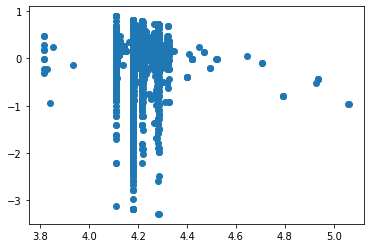

bartlett stats:  BartlettResult(statistic=24828.17042822652, pvalue=0.0)
levene stats:  LeveneResult(statistic=5088.869873380253, pvalue=0.0)


In [22]:
# answer below:
lr = sm.OLS(y_train, X_train)
fit = lr.fit()
print(fit.summary())

prediction = fit.predict(X_train)
residual = (y_train - prediction)

bart_stats = bartlett(residual, prediction)
lev_stats = levene(residual, prediction)

plt.scatter(prediction, residual)
plt.show()

print('bartlett stats: ', bart_stats)
print('levene stats: ', lev_stats)


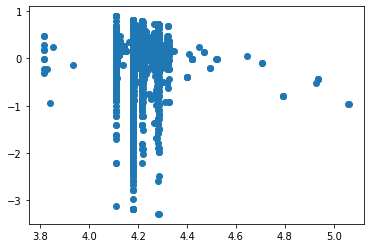

In [24]:
residual = (y_train - prediction)

bart_stats = bartlett(residual, prediction)
lev_stats = levene(residual, prediction)

plt.scatter(prediction, residual)
plt.show()

Scale your predictors and refit the linear model.

* How does this change the coefficients?
* How does this change the coefficients' p values?
* How does this change model performance?

In [25]:
# answer below:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
transformed_data = pd.DataFrame(scaler.fit_transform(clean_data), columns=clean_data.columns)
transformed_data

,Rating,Reviews,Price,Paid,Everyone 10+,Mature 17+,Teen
0,0.775,2.021538e-06,0.0,0.0,0.0,0.0,0.0
1,0.725,1.235953e-05,0.0,0.0,0.0,0.0,0.0
2,0.925,1.119638e-03,0.0,0.0,0.0,0.0,0.0
3,0.875,2.759054e-03,0.0,0.0,0.0,0.0,1.0
4,0.825,1.235953e-05,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
9357,0.750,7.676727e-08,0.0,0.0,0.0,0.0,0.0
9358,0.875,4.733982e-07,0.0,0.0,0.0,0.0,0.0
9359,1.000,3.838364e-08,0.0,0.0,0.0,0.0,0.0
9360,0.875,1.445784e-06,0.0,0.0,0.0,1.0,0.0


In [27]:
y = transformed_data['Rating']
X = transformed_data.iloc[:, 1::]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.10
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           2.33e-12
Time:                        14:25:27   Log-Likelihood:                 4809.2
No. Observations:                7489   AIC:                            -9604.
Df Residuals:                    7482   BIC:                            -9556.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7948      0.002    462.477   

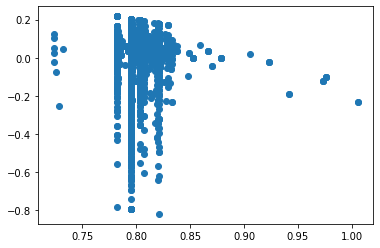

bartlett stats:  BartlettResult(statistic=25106.51646127762, pvalue=0.0)
levene stats:  LeveneResult(statistic=4977.4971191103805, pvalue=0.0)


In [28]:
lr = sm.OLS(y_train, X_train)
fit = lr.fit()
print(fit.summary())

prediction = fit.predict(X_train)
residual = (y_train - prediction)

bart_stats = bartlett(residual, prediction)
lev_stats = levene(residual, prediction)

plt.scatter(prediction, residual)
plt.show()

print('bartlett stats: ', bart_stats)
print('levene stats: ', lev_stats)

In [29]:
no_maturity_level = transformed_data.drop(columns=['Everyone 10+', 'Mature 17+', 'Teen'], axis=1)
y = no_maturity_level['Rating']
X = no_maturity_level.iloc[:, 1::]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     18.76
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           4.07e-12
Time:                        15:47:40   Log-Likelihood:                 4768.0
No. Observations:                7489   AIC:                            -9528.
Df Residuals:                    7485   BIC:                            -9500.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7948      0.002    511.680      0.0

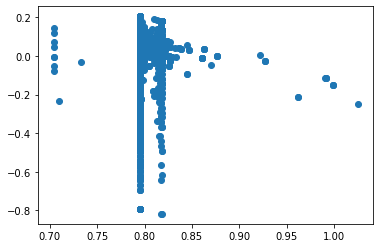

bartlett stats:  BartlettResult(statistic=26349.466517081157, pvalue=0.0)
levene stats:  LeveneResult(statistic=5294.179554184369, pvalue=0.0)


In [145]:
lr = sm.OLS(y_train, X_train)
fit = lr.fit()
print(fit.summary())

prediction = fit.predict(X_train)
residual = (y_train - prediction)

bart_stats = bartlett(residual, prediction)
lev_stats = levene(residual, prediction)

plt.scatter(prediction, residual)
plt.show()

print('bartlett stats: ', bart_stats)
print('levene stats: ', lev_stats)
